<a href="https://colab.research.google.com/github/alangaurav/DAV15714/blob/master/Week_Two_and_Three_Inferential_Stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Standard Imports

In [2]:
# Standard imports
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import numpy as np
# Used for statistical plotting, built on top of matplotlib
# Use cases: Heat maps, scatter plots, etc.
import seaborn as sns

# Sklearn algos
from sklearn.ensemble import ExtraTreesClassifier

# Week Two: Inferential Statistics
- t test
- ANOVA
  - One way
  - Two way
  

In [3]:
# Get brain size data and casual analysis
bs_df = pd.read_csv('/content/drive/MyDrive/DAV Lab/Week Two/datasets/brain_size.csv', sep=';', na_values='.')
print(bs_df.describe())
print(bs_df.head())

# Clean up dataframe
bs_df.drop("Unnamed: 0", axis=1, inplace=True)
print(bs_df.head())

# For t-test we require categorical data: group by gender
gender = bs_df.groupby(["Gender"])
print(gender.describe())

# Transpose gender description to get descriptive analytics information for Male and Female
gender_t = gender.describe().transpose()
gender_t.skew()
gender_t.kurt()

       Unnamed: 0        FSIQ         VIQ        PIQ      Weight     Height  \
count   40.000000   40.000000   40.000000   40.00000   38.000000  39.000000   
mean    20.500000  113.450000  112.350000  111.02500  151.052632  68.525641   
std     11.690452   24.082071   23.616107   22.47105   23.478509   3.994649   
min      1.000000   77.000000   71.000000   72.00000  106.000000  62.000000   
25%     10.750000   89.750000   90.000000   88.25000  135.250000  66.000000   
50%     20.500000  116.500000  113.000000  115.00000  146.500000  68.000000   
75%     30.250000  135.500000  129.750000  128.00000  172.000000  70.500000   
max     40.000000  144.000000  150.000000  150.00000  192.000000  77.000000   

          MRI_Count  
count  4.000000e+01  
mean   9.087550e+05  
std    7.228205e+04  
min    7.906190e+05  
25%    8.559185e+05  
50%    9.053990e+05  
75%    9.500780e+05  
max    1.079549e+06  
   Unnamed: 0  Gender  FSIQ  VIQ  PIQ  Weight  Height  MRI_Count
0           1  Female   1

,0
Gender,
Female,3.828797
Male,3.788411


In [5]:
# T test
# One sample test : VIQ
stats.ttest_1samp(bs_df["VIQ"], 0)

# One sample test : VIQ
# Null hypt: mean is 100
# Alt. hypt: mean is not 100
result = stats.ttest_1samp(bs_df["VIQ"], 100, 0)
# Set confidence interval. If low > critical point: h0 is rejected
low, high = result.confidence_interval(0.98)
if (low > 100):
  print("H0 is rejected")
result.confidence_interval(0.95)
result.confidence_interval(0.99)
# p-value method
# For confidence = 95
if (result.pvalue < 0.05/2):
  print("H0 rejected: Mean is across groups is not 100")
else:
  print("Ha rejected: Mean across groups is 100")

H0 is rejected
H0 rejected: Mean is across groups is not 100


In [6]:
# Independent t test
# Two groups: Male and Female
# Stat: FSIQ
males = bs_df[bs_df["Gender"] == "Male"]
females = bs_df[bs_df["Gender"] == "Female"]
result = stats.ttest_ind(males["FSIQ"], females["FSIQ"])
print(result)

# Stat: PIQ
result = stats.ttest_ind(males["PIQ"], females["PIQ"])
result.confidence_interval(0.95)
result.confidence_interval(0.98)
result.confidence_interval(0.99)

TtestResult(statistic=0.4026724743703011, pvalue=0.6894456253897778, df=38.0)


ConfidenceInterval(low=-18.363574233053352, high=20.663574233053335)

In [7]:
# Paired t test on two related stats VIQ and PIQ
results = stats.ttest_rel(bs_df["VIQ"], bs_df["PIQ"])
result.confidence_interval(0.95)
result.confidence_interval(0.98)
result.confidence_interval(0.99)
results

TtestResult(statistic=0.5445841763599564, pvalue=0.5891401178507841, df=39)

In [8]:
# ANOVA
# One way ANOVA
# Example: Scores
# Load the score dataset and understand it
scores = pd.read_excel('/content/drive/MyDrive/DAV Lab/Week Two/datasets/score.xlsx')
scores.head(), scores.describe()

# Use scipy built in stats function for one way anova
# Function takes groups as varargs
result = stats.f_oneway(scores['A'], scores['B'], scores['C'], scores['D'])
result
fval = result.statistic
pval = result.pvalue
# p-value method
# For confidence = 95
# IMPORTANT: f_oneway is only one tailed analysis
if (pval < 0.05):
  print("H0 rejected: Mean across groups is not the same")
else:
  print("Ha rejected: Mean across groups is the same")

H0 rejected: Mean across groups is not the same


In [9]:
# One way ANOVA
# Example: Irises
# Load an understand data
iris = pd.read_csv('/content/drive/MyDrive/DAV Lab/Week Two/datasets/iris.csv')
iris.head(), iris.describe()

# Create categories by grouping data using name
# Use scipy to run ANOVA
result = stats.f_oneway(iris['petal_width'][iris['name'] == 'setosa'], iris['petal_width'][iris['name'] == 'versicolor'], iris['petal_width'][iris['name'] == 'virginica'])
fval, pval = result
# p-value method
# For confidence = 95
# IMPORTANT: f_oneway is only one tailed analysis
if (pval < 0.05):
  print("H0 rejected: Mean across groups is not the same")
else:
  print("Ha rejected: Mean across groups is the same")

H0 rejected: Mean across groups is not the same


            df      sum_sq     mean_sq          F    PR(>F)
Fitness    1.0  666.216867  666.216867  34.749543  0.000006
Residual  22.0  421.783133   19.171961        NaN       NaN
            df      sum_sq     mean_sq          F    PR(>F)
Fitness    1.0  666.216867  666.216867  34.749543  0.000006
Residual  22.0  421.783133   19.171961        NaN       NaN
            df      sum_sq     mean_sq          F    PR(>F)
Fitness    1.0  666.216867  666.216867  34.749543  0.000006
Residual  22.0  421.783133   19.171961        NaN       NaN


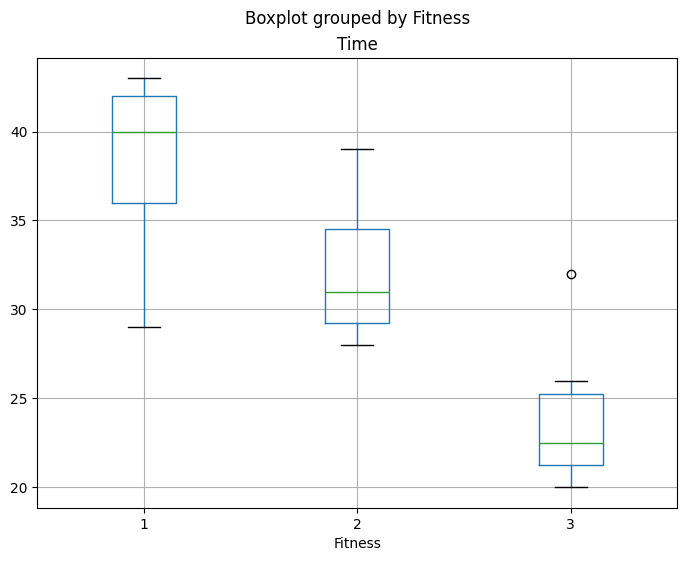

In [10]:
# One way ANOVA
# Example: Table methods
# Get the data
rehab = pd.read_csv('/content/drive/MyDrive/DAV Lab/Week Two/datasets/rehab.csv')
rehab.head(), rehab.describe()

# Create a table to understand ss, mean_ss, df and F value
# Use matplotlib to generate a table
# source, df, ss, mean ss, F, P columns
fg, ax = plt.subplots(figsize=(8, 6))
fg = rehab.boxplot('Time', 'Fitness', ax=ax)

# SS (How does his work??) => Oridnary Least Squares
ss = ols('Time ~ Fitness', data=rehab).fit()
print(anova_lm(ss))
# Two way ANOVA
print(anova_lm(ss, type=2))
print(anova_lm(ss, type=3))

# Week Three: Inferential Statistics
- Correlation
- Chi Square
- Correlation Heatmap
- Feature Importance using Correlation

## Correlation
- Using Pandas and Scipy
- Based on Pearson's r


,a,b,c,d,e
a,1.000000,0.962654,0.942664,0.999186,-0.952722
b,0.962654,1.000000,0.992267,0.964684,-0.933838
c,0.942664,0.992267,1.000000,0.944172,-0.939825
d,0.999186,0.964684,0.944172,1.000000,-0.947839
e,-0.952722,-0.933838,-0.939825,-0.947839,1.000000


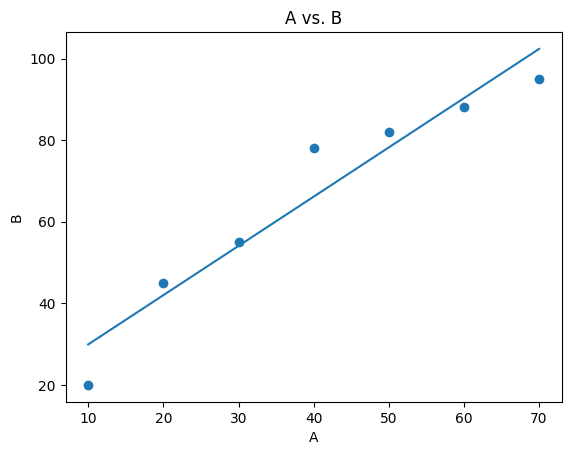

In [11]:
# Basic correlation using Pandas
dataset = {'a': [10, 20, 30, 40, 50, 60, 70],
           'b': [20, 45, 55, 78, 82, 88, 95],
           'c': [10, 45, 67, 99, 98, 100, 120],
           'd': [15, 25, 33, 43, 54, 61, 71],
           'e': [140, 120, 55, 65, 44, 30, 3]
          }
df = pd.DataFrame(dataset)
a = df['a']
b = df["b"]
c = df["c"]
d = df["d"]
e = df["e"]

# Underscatter plot of two variables
fig, ax = plt.subplots()
ax.scatter(x=a, y=b)
ax.set(title="A vs. B", xlabel='A', ylabel='B')
ax.plot(np.unique(a), np.poly1d(np.polyfit(a, b, 1))(np.unique(a)))

# Correlation between any two columns/variables
r = a.corr(b)
r

# Creating a correlation matrix
r_df = df.corr()
r_df

In [13]:
# Correlation using scipy stats
rval, pval = stats.pearsonr(a, b)
print(f'Pearsons r: {rval} \npval: {pval}')

# H0: A and B are perfectly dependent variables
# HA: A and B are independent variables
# Assume confidence value is 95%
# Based on two-tailed analysis
alpha = 0.05
if pval < alpha/2:
  print('Alternate hypothesis is accepted')
else:
  print('Null hypothesis is accepted')

Pearsons r: 0.9626543716854525 
pval: 0.0005073512045770584
Alternate hypothesis is accepted


In [14]:
# Using scipy and datasets
mobile = pd.read_csv('/content/drive/MyDrive/DAV Lab/Week Three/mobile.csv')
print(mobile.head())
print(mobile.describe())

battery_power = mobile['battery_power']
clock_speed = mobile['clock_speed']

rval, pval = stats.pearsonr(battery_power, clock_speed)
print(f'Pearsons r: {rval} \npval: {pval}')

# H0: A and B are perfectly dependent variables
# HA: A and B are independent variables
# Assume confidence value is 99%
# Based on two-tailed analysis
alpha = 0.01
if pval < alpha/2:
  print('Alternate hypothesis is accepted')
else:
  print('Null hypothesis is accepted')

   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_

## Chi Square

In [16]:
# Chi square test of best fit
# Using scipy chisquare
# Random data set over the course of seven days?
f_obs = [110, 120, 230, 150, 170, 420, 300]
f_exp = [200, 200, 200, 200, 200, 250, 250]

xval, pval = stats.chisquare(f_obs, f_exp)
print(f'Chi-sqaure: {xval} \npval: {pval}')

# H0: The expected frequency distribution is the same as observed
# HA: There is a difference between observed and expected freq distributions
# Assume confidence value is 99%
# Based on two-tailed analysis
alpha = 0.01
if pval < alpha/2:
  print('Alternate hypothesis is accepted')
else:
  print('Null hypothesis is accepted')

Chi-sqaure: 219.6 
pval: 1.2663413447683768e-44
Alternate hypothesis is accepted


In [17]:
# Chi square test of independence
# Using scipy chisquare

# H0: There is no relationship between the categorical variables.
# HA: : There is a relationship between the categorical variables.

# Obtain categorical data
titanic = pd.read_csv('/content/drive/MyDrive/DAV Lab/Week Three/titanic.txt')
print(titanic.head())
print(titanic.describe())

# Create categorical data: Sex and Survival are the categories
# Create frequency distribution using crosstab
# pd.crosstab() :
# Compute a simple cross tabulation of two (or more) factors.
# By default, computes a frequency table of the factors unless an array of values and an aggregation function are passed.

freq_dist = pd.crosstab(titanic['Sex'], titanic['Survived'])
print(f'Frequency Distribtion:\n {freq_dist}\n')

# Chi square independence test
tstat, pval, df, e_val = stats.chi2_contingency(freq_dist)
print(f'Chi-square test statistic: {tstat}\nP value: {pval}\nDegree of freedom: {df}\nExpected values: {e_val}\n')

# Assuming confidence interval of 95%
alpha = 0.05
if pval < alpha/2:
  print('Alternate hypothesis is accepted')
else:
  print('Null hypothesis is accepted')

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

## Heatmaps and Feature Importance

- Heat maps provide a visual representation of a contingency matrix
- Based on heatmaps and variable dependence => Feature selection can be done
- Features selected on this basis will prove to have better results during modelling

   pregNo  glucose  bp  skin  insulin   bmi  pedigree  age  class
0       6      148  72    35        0  33.6     0.627   50      1
1       1       85  66    29        0  26.6     0.351   31      0
2       8      183  64     0        0  23.3     0.672   32      1
3       1       89  66    23       94  28.1     0.167   21      0
4       0      137  40    35      168  43.1     2.288   33      1
            pregNo   glucose        bp      skin   insulin       bmi  \
pregNo    1.000000  0.129459  0.141282 -0.081672 -0.073535  0.017683   
glucose   0.129459  1.000000  0.152590  0.057328  0.331357  0.221071   
bp        0.141282  0.152590  1.000000  0.207371  0.088933  0.281805   
skin     -0.081672  0.057328  0.207371  1.000000  0.436783  0.392573   
insulin  -0.073535  0.331357  0.088933  0.436783  1.000000  0.197859   
bmi       0.017683  0.221071  0.281805  0.392573  0.197859  1.000000   
pedigree -0.033523  0.137337  0.041265  0.183928  0.185071  0.140647   
age       0.544341  0.263514

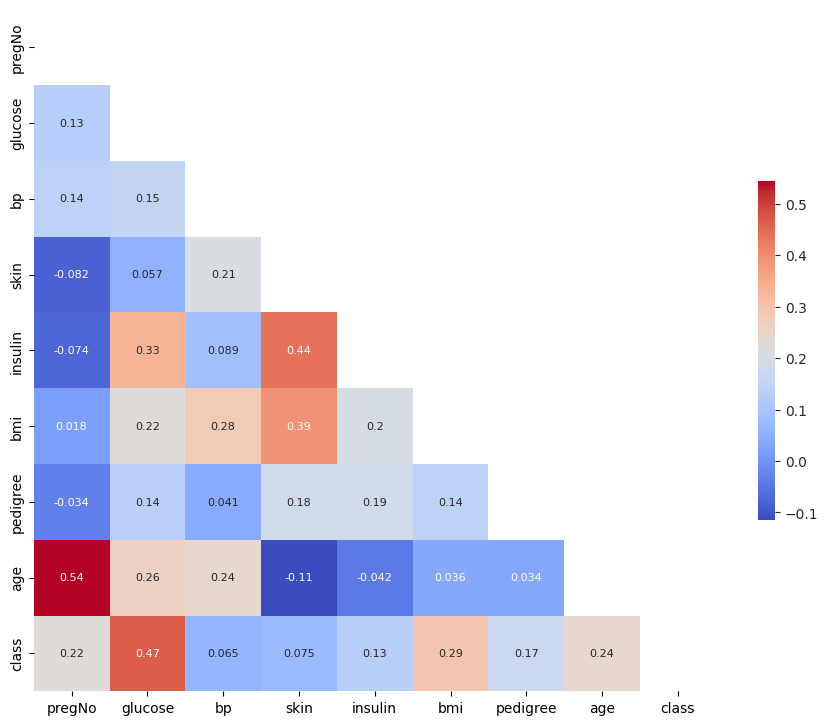

In [18]:
# Load dataset
pima = pd.read_excel('/content/drive/MyDrive/DAV Lab/Week Three/pima-indians-diabetes.xlsx')
print(pima.head())

# Create correlation for the dataframe
correlation = pima.corr()
print(correlation)

# Create heatmap
fg, ax = plt.subplots(figsize=(11, 11))
sns.set_style('white')

# Seaborn recommendations:
# qualitative palettes, good for representing categorical data
# sequential palettes, good for representing numeric data
# diverging palettes, good for representing numeric data with a categorical boundary
# DIverging palette:
cmap = sns.color_palette("coolwarm", as_cmap=True)
#sns.heatmap(correlation, cmap=cmap, square=True)

# Add mask
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation, cmap=cmap, mask=mask, square=True, annot=True, annot_kws={"size":8}, cbar_kws={"shrink": .4})
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

<Axes: title={'center': 'Feature Heat Map'}>

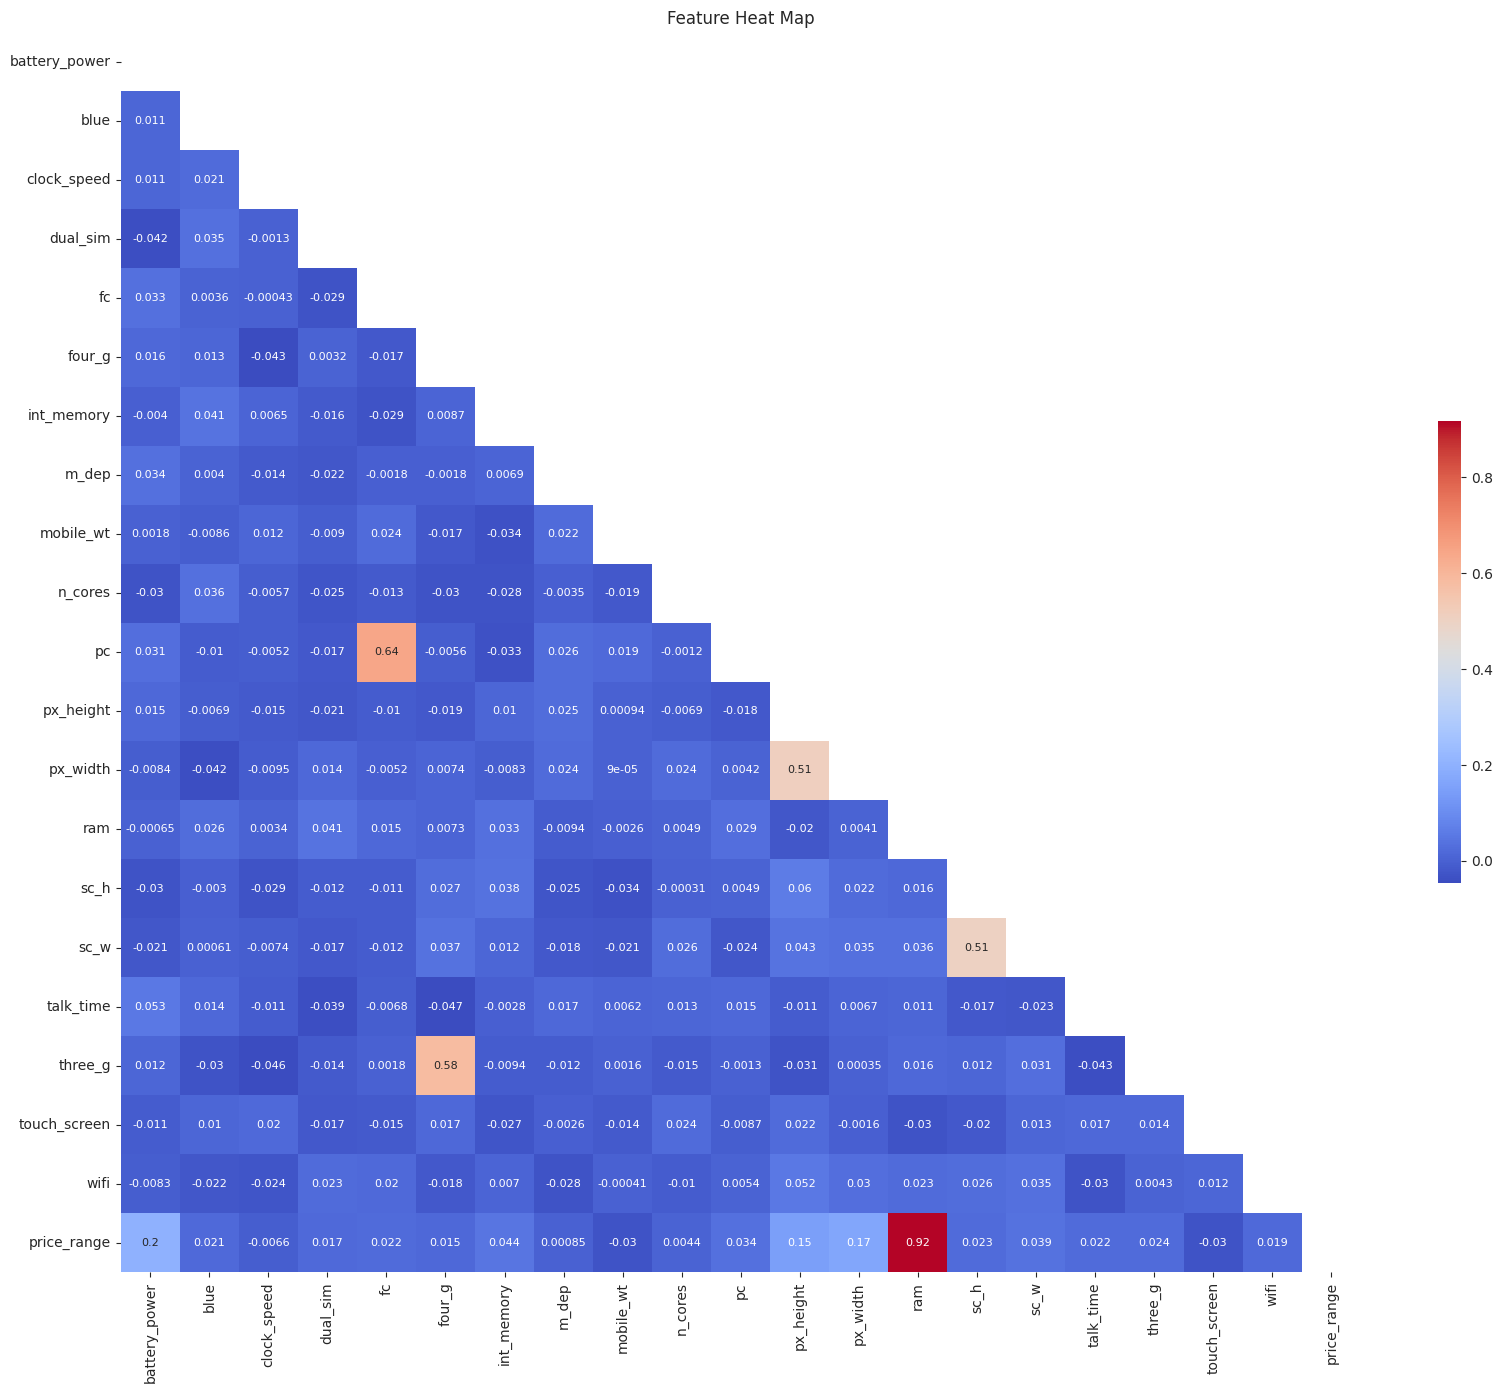

In [19]:
# Heat map to understand feature importance
# Use mobile dataset

# Correlation of features
corr = mobile.corr()

# Heat map
fg, ax = plt.subplots(figsize=(20, 20))
ax.set(title="Feature Heat Map")
cmap = sns.color_palette("coolwarm", as_cmap=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, cmap=cmap, annot=True, annot_kws={"size": 8}, square=True, cbar_kws={"shrink": .3}, xticklabels=True, mask=mask)

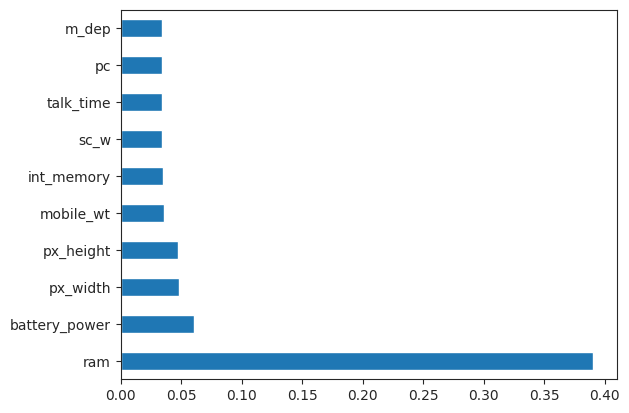

In [20]:
# Understanding feature importance using heatmaps and correlations

# Train test split data
X = mobile.drop('price_range', axis=1)
y = mobile['price_range']

# Fit the model to understand feature importance
model = ExtraTreesClassifier()
model.fit(X, y)

# Use built-in feature importance
'''
The higher, the more important the feature.
The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature.
It is also known as the Gini importance.
'''
model.feature_importances_

# Graph the feature importances
feat_imp = pd.Series(model.feature_importances_, index=X.columns)
# Understand the top 10 most important features
feat_imp.nlargest(10).plot(kind='barh')
plt.show()